<a href="https://colab.research.google.com/github/EmptyJackson/video-super-resolution/blob/master/notebooks/sisr_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single image super-resolution demonstration

Select GPU hardware acceleration (TPU not supported by TensorFlow 2) in Runtime > Change runtime type

In [0]:
%tensorflow_version 2.x

from google.colab import drive
drive.mount('/content/gdrive')

## Repository clone and dataset download (first time only)

In [0]:
"""
%mkdir gdrive/My Drive/Part_II_Dissertation
%cd gdrive/My Drive/Part_II_Dissertation
!git clone https://github.com/EmptyJackson/video-super-resolution
"""

In [0]:
"""
%cd video-super-resolution
"""

## Repository update (subsequent uses)

In [0]:
%cd gdrive/My Drive/Part_II_Dissertation/video-super-resolution

In [0]:
!git pull

## Demonstration

In [0]:
!python training/tools/crop_image.py data/div2k/DIV2K_valid_LR_bicubic/X4/0846x4.png lr_crop.png 240
!python training/tools/crop_image.py data/div2k/DIV2K_valid_HR/0846.png hr_orig.png 240 standard 4
#!python training/tools/crop_image.py data/div2k/DIV2K_train_LR_bicubic/X4/0791x4.png lr_crop.png 240
#!python training/tools/crop_image.py data/div2k/DIV2K_train_HR/0791.png hr_orig.png 240 standard 4
#!python training/tools/crop_image.py data/div2k/DIV2K_train_LR_bicubic/X2/0049x2.png lr_crop.png 240
#!python training/tools/crop_image.py data/div2k/DIV2K_train_HR/0049.png hr_orig.png 240 standard 4
!python training/upscale_image.py lr_crop.png hr_bicb.png bicubic 4

In [0]:
#!python training/upscale_image.py lr_crop.png hr_pred.png network checkpoints/edsr_x4_240p/ 140
!python training/upscale_image.py lr_crop.png hr_pred.png network checkpoints/core_MED_SUB_PIXEL_GLOBAL_RELU/ 480

"""
!python training/tools/crop_image.py lr_crop.png lr_crop.png 240 square
!python training/tools/crop_image.py hr_bicub.png hr_bicb.png 480 square
!python training/tools/crop_image.py hr_pred.png hr_pred.png 480 square
"""

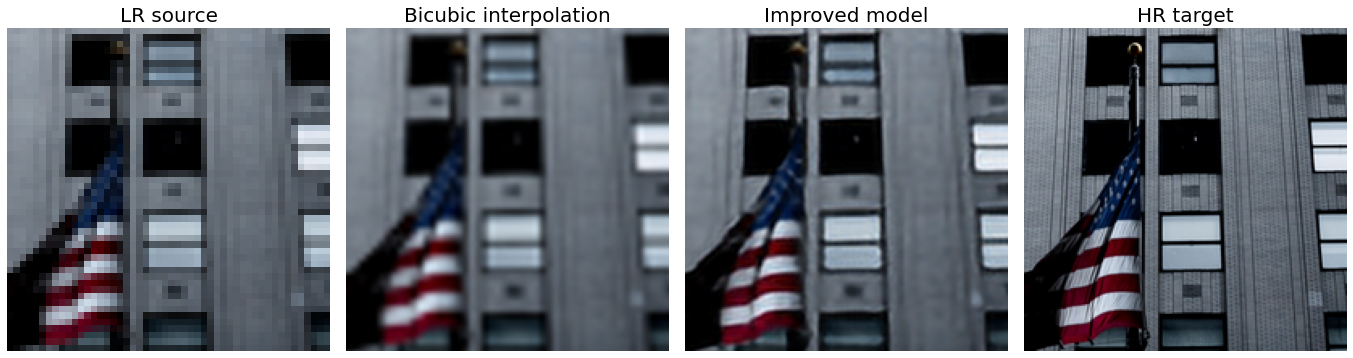

In [0]:
import matplotlib.pyplot as plt
import numpy as np

s = 4
x = np.array([160, 210])
y = np.array([175, 225])
adj = True

def crop(im, x, y):
  return im[y[0]:y[1], x[0]:x[1], :]

fig = plt.figure(figsize=(24,15))
ax = fig.add_subplot(1, 4, 1)
im = plt.imread('lr_crop.png')
if adj:
  im = crop(im, x, y)
plt.axis('off')
plt.imshow(im)
ax.set_title('LR source', fontsize=20)


ax = fig.add_subplot(1, 4, 2)
im = plt.imread('hr_bicb.png')
if adj:
  im = crop(im, x*s, y*s)
plt.axis('off')
plt.imshow(im)
ax.set_title('Bicubic interpolation', fontsize=20)


ax = fig.add_subplot(1, 4, 3)
im = plt.imread('hr_pred.png')
if adj:
  im = crop(im, x*s, y*s)
plt.axis('off')
plt.imshow(im)
ax.set_title('Improved model', fontsize=20)


ax = fig.add_subplot(1, 4, 4)
im = plt.imread('hr_orig.png')
if adj:
  im = crop(im, x*s, y*s)
plt.axis('off')
plt.imshow(im)
ax.set_title('HR target', fontsize=20)

plt.subplots_adjust(wspace=0.05)
plt.savefig('example.png', bbox_inches='tight')
plt.show()

In [0]:
!python inference/evaluation.py --warm_runs 0 --eval_runs 1 --scale 4 --epoch 480 --size m --upscale sp --residual g --activation r